In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
#filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_stf_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    print (ds.variables)

Frozen({'time': <xarray.IndexVariable 'time' (time: 504)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T, 'longitude': <xarray.IndexVariable 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 721)>
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y, 'slhf': <xarray.Variable (time: 504,

In [3]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_rad_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    latitude = ds['latitude'].values
    ssr = ds['ssr'].mean(['time','longitude']).values#incoming, from out
    stherm = ds['str'].mean(['time','longitude']).values#incoming, from surface
    tsr = ds['tsr'].mean(['time','longitude']).values#outgoing, TOA, shortwave
    ttr = ds['ttr'].mean(['time','longitude']).values#outgoing, TOA, longwave/thermal
    

In [4]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_stf_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    latitude = ds['latitude'].values
    slhf = ds['slhf'].mean(['time','longitude']).values#latent heat flux
    sshf = ds['sshf'].mean(['time','longitude']).values#sensible heat flux

Text(0, 0.5, 'Energy Flux (W/m^-2)')

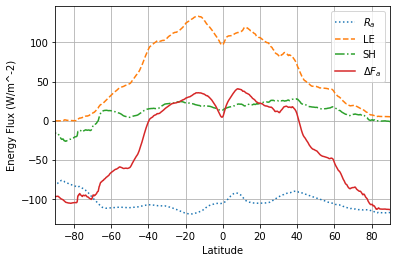

In [5]:
tot_rad = -ssr-stherm+tsr+ttr
DFa = tot_rad-slhf-sshf
time_norm = 86400
lns=[]
#lns=lns+plt.plot(latitude,ssr/time_norm,label='ssr')
#lns=lns+plt.plot(latitude,stherm/time_norm,label='str')
#lns=lns+plt.plot(latitude,tsr/time_norm,label='tsr')
#lns=lns+plt.plot(latitude,ttr/time_norm,label='ttr')
lns=lns+plt.plot(latitude,tot_rad/time_norm,linestyle='dotted',label=r'$R_a$')
lns=lns+plt.plot(latitude,-slhf/time_norm,linestyle='dashed',label='LE')
lns=lns+plt.plot(latitude,-sshf/time_norm,linestyle='dashdot',label='SH')
lns=lns+plt.plot(latitude,DFa/time_norm,label=r'$\Delta F_a$')
plt.xlim(latitude.min(), latitude.max())
plt.grid(True)
plt.legend(loc=0)
plt.xlabel("Latitude")
plt.ylabel("Energy Flux (W/m^-2)")

Text(0, 0.5, 'R1 (unitless)')

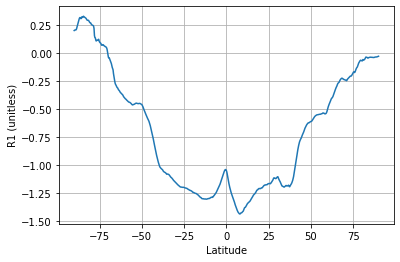

In [6]:
lns=[]
lns = lns+plt.plot(latitude, -(slhf+sshf)/tot_rad)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("R1 (unitless)")

In [3]:
import xarray as xr
era5_sshf = xr.open_dataset("/project2/rossby/group11/era5_sshf_1979_2020_tzmean.nc")['sshf'].values
era5_slhf = xr.open_dataset("/project2/rossby/group11/era5_slhf_1979_2020_tzmean.nc")['slhf'].values
era5_ssr = xr.open_dataset("/project2/rossby/group11/era5_ssr_1979_2020_tzmean.nc")['ssr'].values #surface solar radiation (downward)
era5_str = xr.open_dataset("/project2/rossby/group11/era5_str_1979_2020_tzmean.nc")['str'].values #surface net thermal radiation (downward)
era5_tsr = xr.open_dataset("/project2/rossby/group11/era5_tsr_1979_2020_tzmean.nc")['tsr'].values #TOA solar radiation (shortwave, up)
era5_ttr = xr.open_dataset("/project2/rossby/group11/era5_ttr_1979_2020_tzmean.nc")['ttr'].values #TOA thermal radiation (longwave, up)

lat = xr.open_dataset("/project2/rossby/group11/era5_sshf_1979_2020_tzmean.nc")['latitude'].values

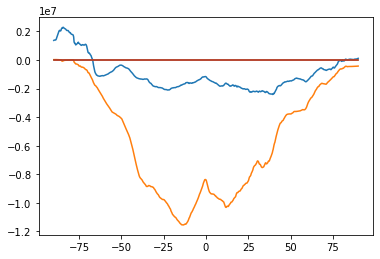

In [4]:
import matplotlib.pyplot as plt
era5_sshf_wm2 = era5_sshf/2.628e+6
era5_slhf_wm2 = era5_slhf/2.628e+6
era5_ra = (era5_tsr + era5_ttr - era5_ssr - era5_str)/2.628e+6
era5_fa = (era5_ra + era5_sshf + era5_slhf)/2.628e+6
plt.plot(lat, era5_sshf, label = "Sensible Heat Flux")
plt.plot(lat, era5_slhf, label = "Latent Heat Flux")
plt.plot(lat, era5_ra, label = "Net Radiation")
plt.plot(lat, era5_fa, label = "Advection")

In [14]:
print(era5_ra)

[-10170525.30158455 -10179148.65430669 -10178363.96967877
 -10182583.19861977 -10188137.55630918 -10192729.45528234
 -10194811.92374663 -10196372.36357854 -10199695.50940401
 -10204555.8594679  -10208633.10182824 -10211983.7270197
 -10210725.57947285 -10208507.65633527 -10209153.2060951
 -10210602.34075706 -10209031.21979058 -10202309.77460715
 -10192474.07396188 -10186276.46816024 -10190240.4178473
 -10196535.47379869 -10193965.5745963  -10180722.70538935
 -10157487.03734167 -10135440.37082662 -10145474.33130594
 -10186945.7186119  -10197669.31886611 -10186758.97660758
 -10197479.85423945 -10187822.77373843 -10169300.59011894
 -10136743.48645823 -10096782.98644403 -10059037.45277729
 -10035965.83319303 -10029972.52383304  -9986809.90456025
  -9980458.58035691  -9987450.24880462  -9967160.91378155
  -9949182.42318673  -9929836.08026371  -9917568.51341013
  -9912101.62537747  -9887583.5109518   -9874099.38878904
  -9872569.11230555  -9869703.55265499  -9862879.49731168
  -9862937.790626